In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os
from operator import itemgetter

import matplotlib.cm as cmap

In [64]:
def list_dirs(path):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            yield item_path

def get_train_results(run_dir):
    train_file = os.path.join(run_dir, 'training.txt')
    with open(train_file) as fp:
        lines = [line for line in fp]
        nums = []
        for line in lines:
            nums.append([float(item) for item in line.split(', ')])
    
    return np.array(nums)
            

def get_all(cell, root='../mrnn/ptb_gridsearch/'):
    cell_dir = os.path.join(root, cell)
    lrs = [lr for lr in list_dirs(cell_dir)]
    ranks = [rank
             for lr_dir in lrs 
             for rank in list_dirs(lr_dir)]
    
    all_results = []
    for run in ranks:
        test_error_file = os.path.join(run, 'test.txt')
        if os.path.exists(test_error_file):
            with open(test_error_file, 'r') as fp:
                results = fp.read()
            xent = float(results.split()[-1])
            
            train_results = get_train_results(run)
            
            all_results.append((xent, run, train_results))
        else:
            print('{} missing test file'.format(run))
    return all_results
            

def get_best(cell, root='../mrnn/ptb_gridsearch/'):
    return min(get_all(cell, root), key=itemgetter(0))

def print_results(xent, run, train_data, width=90):
    splits = run.split(os.sep)
    cell, lr, rank = splits[-3:]
    left = '{:<{}}'.format('{}, {}, {}: '.format(cell, lr, rank), width//2)
    right = '{:>{}}'.format('xent: {} (perp: {})'.format(xent, np.exp(xent)), width//2)
    print(left + right)

In [15]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print_results(*get_best(cell))

cp-gate, lr-0.01, rank-64:                   xent: 4.885653404962449 (perp: 132.37693282689688)
cp-gate-combined, lr-0.01, rank-64:          xent: 4.955027512141636 (perp: 141.8865099210179)
cp-gate-linear, lr-0.01, rank-64:            xent: 4.822537808191209 (perp: 124.28008993728801)
cp-gate-combined-linear, lr-0.01, rank-32:   xent: 4.867019812266032 (perp: 129.93311424781592)
gru, lr-0.001, rank-1:                       xent: 4.983666510809035 (perp: 146.0087440705367)
lstm, lr-0.01, rank-1:                       xent: 4.922782648177374 (perp: 137.38437416525827)
vanilla, lr-0.001, rank-1:                   xent: 5.068119934626988 (perp: 158.87535033840834)


In [17]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print('~'*30)
    for xent, run, _ in get_all(cell):
        print_results(xent, run, _)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cp-gate, lr-0.001, rank-1:                   xent: 5.109675021398635 (perp: 165.61652430088108)
cp-gate, lr-0.001, rank-128:                 xent: 5.045906066894531 (perp: 155.38502466214297)
cp-gate, lr-0.001, rank-256:                 xent: 5.051006158192952 (perp: 156.17952676882348)
cp-gate, lr-0.001, rank-32:                  xent: 5.015638669331868 (perp: 150.75238695287655)
cp-gate, lr-0.001, rank-64:                  xent: 5.022647653307233 (perp: 151.81271960374767)
cp-gate, lr-0.001, rank-8:                   xent: 5.027349630991618 (perp: 152.5282204397864)
cp-gate, lr-0.01, rank-1:                    xent: 4.9249699002220515 (perp: 137.6851972866217)
cp-gate, lr-0.01, rank-128:                  xent: 4.903404939742315 (perp: 134.7478076290299)
cp-gate, lr-0.01, rank-256:                  xent: 4.944313299088251 (perp: 140.37442250259917)
cp-gate, lr-0.01, rank-32:                   xent: 4.889160928272066 (perp: 132.84206325548897)
cp-gate, lr

In [20]:
def results_by_rank(cell, root='../mrnn/ptb_gridsearch/'):
    """Get the best results per rank"""
    results = {}
    for xent, run, train_data in get_all(cell, root=root):
        _, _, rank = run.split(os.sep)[-3:]
        rank = int(rank.split('-')[-1])
        if rank not in results or xent < results[rank][0]:
            results[rank] = (xent, train_data)
    results = [(a, b, c) for a, (b, c) in results.items()]
    return results

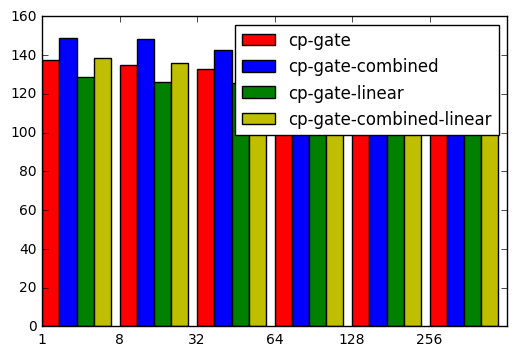

In [21]:
axes = plt.subplot(111)
width = 1/4.5

colours = ['r', 'b', 'g', 'y']
cells = ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear']
rects = [[], []]
for i, cell in enumerate(cells):
    data = results_by_rank(cell)
    data = sorted(data)
    ixes = np.arange(len(data))
    rect = plt.bar(ixes + (i*width), np.exp([item[1] for item in data]), width, color=colours[i])
    rects[0].append(rect[0])
    rects[1].append(cell)
    
axes.set_xticklabels([item[0] for item in data])
#plt.ylim(4, 6)
plt.legend(*rects)

In [24]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print('~'*30)
    for xent, run, _ in get_all(cell, root='../mrnn/ptb_grid_width128_sl150/'):
        print_results(xent, run, _)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cp-gate, lr-0.005, rank-1:                   xent: 4.922528319888645 (perp: 137.34943787531049)
cp-gate, lr-0.005, rank-128:                 xent: 4.887893623775906 (perp: 132.67381854260424)
cp-gate, lr-0.005, rank-256:                 xent: 4.9321525891621905 (perp: 138.67770740908583)
cp-gate, lr-0.005, rank-32:                  xent: 4.898346494745325 (perp: 134.06791430691126)
cp-gate, lr-0.005, rank-64:                  xent: 4.878403469368264 (perp: 131.42067916698133)
cp-gate, lr-0.005, rank-8:                   xent: 4.918430134102151 (perp: 136.78770618783162)
cp-gate, lr-0.01, rank-1:                    xent: 4.9234025566666215 (perp: 137.46956630803138)
cp-gate, lr-0.01, rank-128:                  xent: 4.9188788025467485 (perp: 136.84909228517967)
cp-gate, lr-0.01, rank-256:                  xent: 4.952815002865261 (perp: 141.57293172687582)
cp-gate, lr-0.01, rank-32:                   xent: 4.895151986016168 (perp: 133.6403165304049)
cp-gate

In [28]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print_results(*get_best(cell, root='../mrnn/ptb_grid_width128_sl150/'))

cp-gate, lr-0.005, rank-64:                  xent: 4.878403469368264 (perp: 131.42067916698133)
cp-gate-combined, lr-0.005, rank-64:         xent: 4.935562275074147 (perp: 139.15136188194208)
cp-gate-linear, lr-0.005, rank-64:           xent: 4.803435943744801 (perp: 121.9286385582693)
cp-gate-combined-linear, lr-0.005, rank-128: xent: 4.848580890231663 (perp: 127.55924077659505)
gru, lr-0.005, rank-1:                       xent: 4.848622639973958 (perp: 127.5645664531969)
lstm, lr-0.005, rank-1:                      xent: 4.9037515145761 (perp: 134.7945159215536)
vanilla, lr-0.005, rank-1:                   xent: 5.05388809133459 (perp: 156.63027492411206)


In [26]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print_results(*get_best(cell, root='../mrnn/ptb_grid_width256/'))

cp-gate, lr-0.005, rank-1:                   xent: 4.950602803911481 (perp: 141.26009039664032)
cp-gate-combined, lr-0.005, rank-32:         xent: 4.98278774533953 (perp: 145.88049298756644)
cp-gate-linear, lr-0.01, rank-32:            xent: 4.884522438049316 (perp: 132.2273035246518)
cp-gate-combined-linear, lr-0.01, rank-32:   xent: 4.92262145451137 (perp: 137.3622304590955)
gru, lr-0.005, rank-1:                       xent: 4.932632105691092 (perp: 138.7442216080331)
lstm, lr-0.01, rank-1:                       xent: 4.995500360216413 (perp: 147.7468535391916)
vanilla, lr-0.005, rank-1:                   xent: 5.011562619890485 (perp: 150.13916338405966)


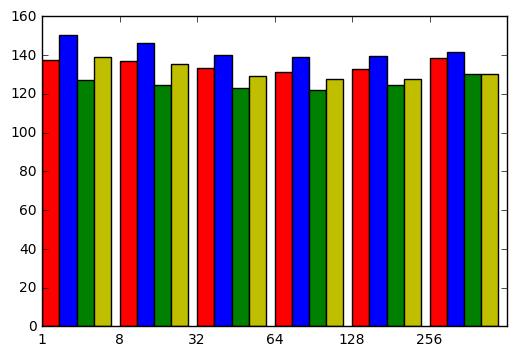

In [30]:
axes = plt.subplot(111)
width = 1/4.5

colours = ['r', 'b', 'g', 'y']
cells = ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear']
rects = [[], []]
for i, cell in enumerate(cells):
    data = results_by_rank(cell, root='../mrnn/ptb_grid_width128_sl150/')
    data = sorted(data)
    ixes = np.arange(len(data))
    rect = plt.bar(ixes + (i*width), np.exp([item[1] for item in data]), width, color=colours[i])
    rects[0].append(rect[0])
    rects[1].append(cell)
    
axes.set_xticklabels([item[0] for item in data])
#plt.ylim(4, 6)
#plt.legend(*rects)

## don't know about the bar idea

but checking the valid curves by rank might be a laff

In [77]:
def plot_validation(results):
    
    for rank, xent, data in sorted(results):
        print(rank, xent)
        plt.plot(np.arange(data.shape[0]), np.exp(data[:,2]), label=rank)
    plt.legend()

1 4.935443984137641
8 4.906908158902769
32 4.8622938085485385
64 4.850587456314652
128 4.848580890231663
256 4.871331868348299


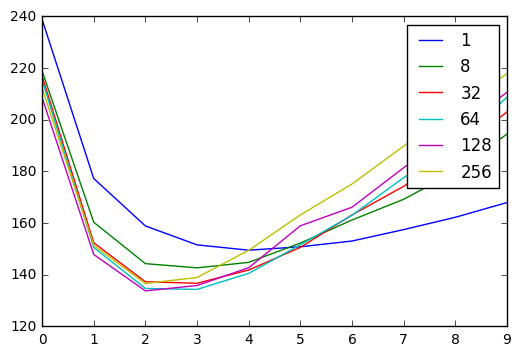

In [78]:
plot_validation(results_by_rank('cp-gate-combined-linear', 
                                '../mrnn/ptb_grid_width128_sl150/'))

1 5.012218987500226
8 4.986563470628527
32 4.943299929300944
64 4.935562275074147
128 4.937371148003472
256 4.95161736453021


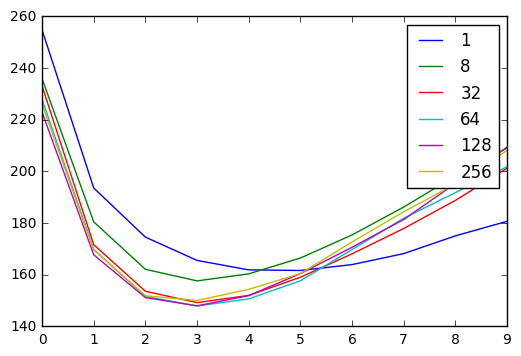

In [79]:
plot_validation(results_by_rank('cp-gate-combined', 
                                '../mrnn/ptb_grid_width128_sl150/'))

1 4.846832681585242
8 4.824687781157317
32 4.8126012131019875
64 4.803435943744801
128 4.826542554078279
256 4.871493215914126


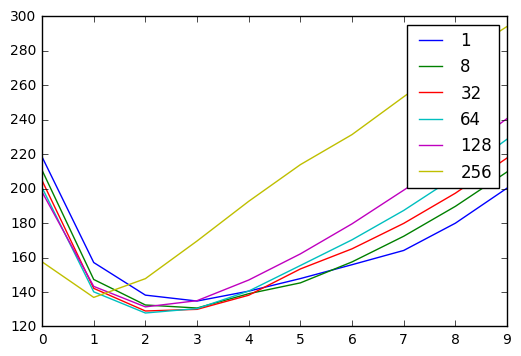

In [80]:
plot_validation(results_by_rank('cp-gate-linear', 
                                '../mrnn/ptb_grid_width128_sl150/'))

1 4.922528319888645
8 4.918430134102151
32 4.895151986016168
64 4.878403469368264
128 4.887893623775906
256 4.9321525891621905


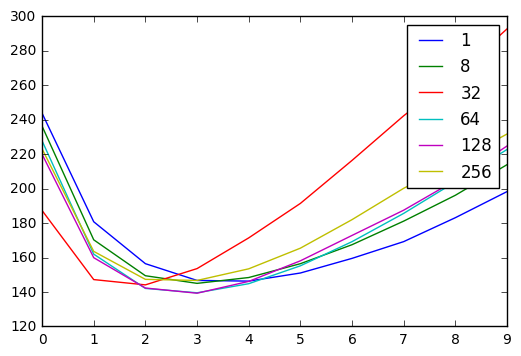

In [81]:
plot_validation(results_by_rank('cp-gate', 
                                '../mrnn/ptb_grid_width128_sl150/'))

not sure these tell much of a story either, might just have to go back to plotting some bars by length

In [161]:
def plot_bars(runs, cell_name):
    xents, ranks = [], []
    
    subs = np.linspace(0.2, 0.8, len(runs))
    colors = [cmap.viridis(x) for x in subs]
    
    for rank, xent, data in sorted(runs)[::-1]:
        xents.append(xent)
        ranks.append(rank)
    
    ind = np.arange(len(xents))
    height = 0.8
    
    plt.figure(figsize=(5,4))
    ax = plt.subplot(111)
    plt.barh(ind, np.exp(xents), height=height, color=colors)
    plt.xlim((100, 155))
    
    plt.yticks(ind + (height/2), ranks)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    plt.ylabel('rank')
    plt.xlabel('test perplexity')
    
    plt.title(cell_name)

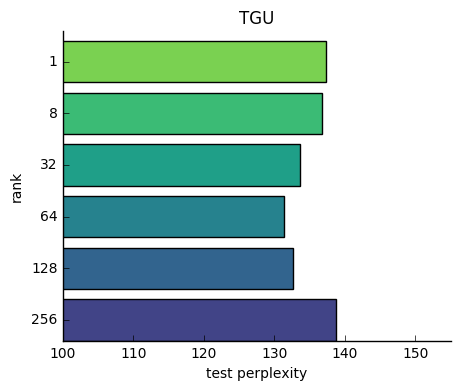

In [162]:
cell = 'cp-gate'
plot_bars(results_by_rank(cell, '../mrnn/ptb_grid_width128_sl150/'), 'TGU')

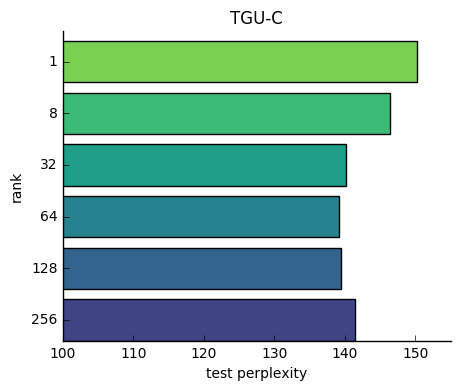

In [163]:
cell = 'cp-gate-combined'
plot_bars(results_by_rank(cell, '../mrnn/ptb_grid_width128_sl150/'), 'TGU-C')

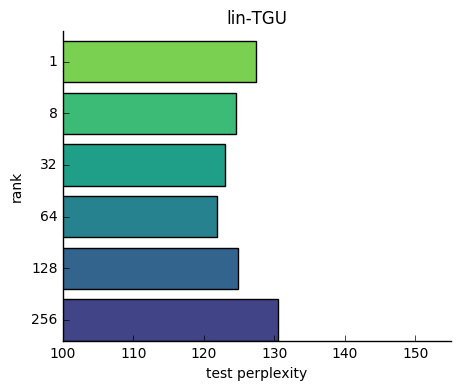

In [164]:
cell = 'cp-gate-linear'
plot_bars(results_by_rank(cell, '../mrnn/ptb_grid_width128_sl150/'), 'lin-TGU')

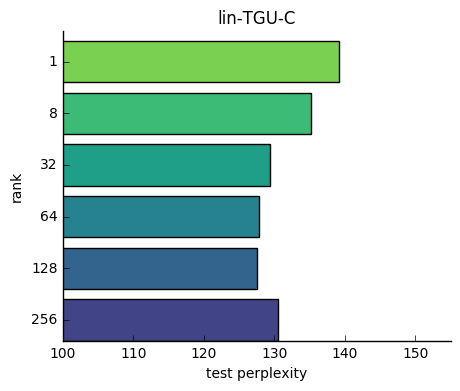

In [165]:
cell = 'cp-gate-combined-linear'
plot_bars(results_by_rank(cell, '../mrnn/ptb_grid_width128_sl150/'), 'lin-TGU-C')